# Machine Learning Scikit-Learn

# Problema de Negócio:
    Usando dados históricos é possivel prever o salário de alguém com base no tempo dedicado aos estudos em horas 
    por mês?

In [1]:
# Importações necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Carregando dos dados

In [2]:
#carregando o dataset
df = pd.read_csv('dataset.csv')

In [3]:
# verifica a quantidade de linhas e colunas da tabela
df.shape

(500, 2)

In [4]:
# verificação das colunas da tabela
df.columns

Index(['horas_estudo_mes', 'salario'], dtype='object')

In [5]:
# obtendo as primeiras linhas da tabela
df.head(5)

,horas_estudo_mes,salario
0,57.0,6813.0
1,48.0,6855.0
2,60.0,5801.0
3,73.0,7431.0
4,46.0,5475.0


In [6]:
# Exibe as informações gerais da tabela
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   horas_estudo_mes  500 non-null    float64
 1   salario           500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [7]:
# Verifica se existe valores ausentes no dataset
df.isnull().sum()

horas_estudo_mes    0
salario             0
dtype: int64

In [8]:
# Correlação entre os dados
df.corr()

,horas_estudo_mes,salario
horas_estudo_mes,1.000000,0.818576
salario,0.818576,1.000000


In [9]:
# Resumo estatisico do dataset
df.describe()

,horas_estudo_mes,salario
count,500.000000,500.000000
mean,50.060000,6018.930000
std,14.659406,848.697853
min,1.000000,3664.000000
25%,39.750000,5473.000000
50%,50.000000,6013.500000
75%,60.000000,6542.000000
max,100.000000,9348.000000


In [10]:
# Resumo estatistico da variável preditora
df['horas_estudo_mes'].describe()

count    500.000000
mean      50.060000
std       14.659406
min        1.000000
25%       39.750000
50%       50.000000
75%       60.000000
max      100.000000
Name: horas_estudo_mes, dtype: float64

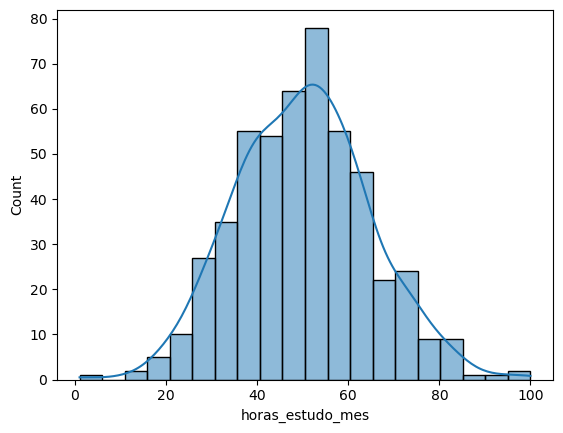

In [12]:
# Histograma da variavel preditora
sns.histplot(data = df, x = 'horas_estudo_mes', kde = True);

# Preparação dos Dados

In [13]:
# Preparando a variavel de entrada
x = np.array(df['horas_estudo_mes'])

In [14]:
# Verifica o tipo criado
type(x)

numpy.ndarray

In [15]:
# Ajusta o shape de x para a análise
x = x.reshape(-1, 1)

In [16]:
# Prepara a variavel alvo
y = df['salario']

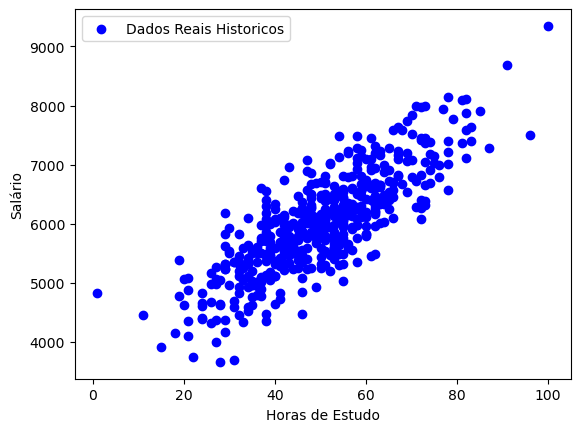

In [17]:
# Gráfikco dr dispersão entre x e y
plt.scatter(x, y, color = "blue", label = 'Dados Reais Historicos')
plt.xlabel("Horas de Estudo")
plt.ylabel("Salário")
plt.legend()
plt.show()

In [18]:
# Dividir dados em treinamento e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, random_state = 42)


In [19]:
x_treino.shape

(400, 1)

In [20]:
x_teste.shape

(100, 1)

In [21]:
y_treino.shape

(400,)

In [22]:
y_teste.shape

(100,)

#  Modelagem Preditiva (Machine Learn)

In [23]:
# Cria um modelo de regressão linear simples
modelo = LinearRegression()

In [24]:
# Treina o modelo
modelo.fit(x_treino, y_treino)

LinearRegression()

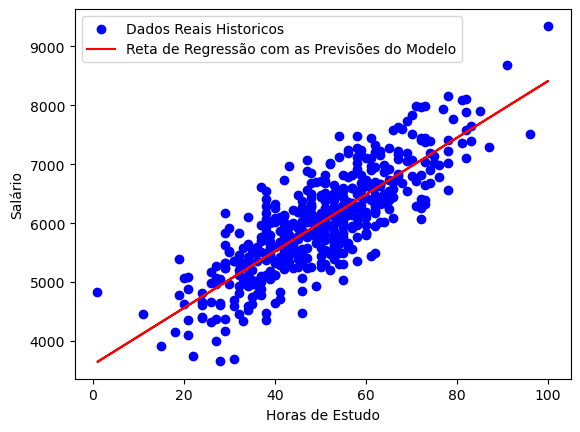

In [25]:
# Visualiza a reta da regressão linear(previsões) e os dados 
plt.scatter(x, y, color = 'blue', label = "Dados Reais Historicos")
plt.plot(x, modelo.predict(x), color = "red", label = "Reta de Regressão com as Previsões do Modelo")
plt.xlabel("Horas de Estudo")
plt.ylabel("Salário")
plt.legend()
plt.show()

In [26]:
# Avalia o modelo nos dados de teste
score = modelo.score(x_teste, y_teste)
print(f"Coeficiente R^2: {score:.2f}")

Coeficiente R^2: 0.59


In [27]:
# Intercrepto - parâmetro W0
modelo.intercept_

3596.7837243727527

In [28]:
# Slope - parâmetro W1
modelo.coef_

array([48.18185277])

# Deploy do Modelo

In [29]:
# Define um novo valor para horas de estudo
horas_estudo_novo = np.array([[48]])

# Faz a previsão com o modelo treinado
salario_previsto = modelo.predict(horas_estudo_novo)

print(f"Se você estudar cerca de {horas_estudo_novo} horas por mês seu salário pode ser igual a {salario_previsto}")

Se você estudar cerca de [[48]] horas por mês seu salário pode ser igual a [5909.5126574]


In [30]:
# O mesmo resultado anterior usando os parâmetros (coeficientes)
# y_novo = W0 + W1 * X
salario = modelo.intercept_ + (modelo.coef_ * horas_estudo_novo)
print(salario)

[[5909.5126574]]


In [31]:
# Define um novo valor para horas de estudo
horas_estudo_novo = np.array([[65]])

# Faz previsão com o modelo treinado
salario_previsto = modelo.predict(horas_estudo_novo)
print(f"Se você estudar cerca de {horas_estudo_novo} horas por mês, seu salário poderá ser igual a {salario_previsto}")

Se você estudar cerca de [[65]] horas por mês, seu salário poderá ser igual a [6728.60415452]


In [32]:
# Definição de um novo valor para horas de estudo
horas_estudo_novo = np.array([[73]])

# Faz previsão com o modelo treinado
salario_previsto = modelo.predict(horas_estudo_novo)
print(f"Se você estudar cerca de {horas_estudo_novo} horas por mês, seu salário poderá ser igual a {salario_previsto}")

Se você estudar cerca de [[73]] horas por mês, seu salário poderá ser igual a [7114.05897669]


# Fim